In [1]:
import time
import math
import random
import decimal
import numpy as np
import matplotlib.pyplot as plt

# Peddle Game - Transfer Matrix

Here we are going to contruct the matrix that represent the sites, but with the boundary conditions on the bords!
We need do that to be easier the neighbor's find and construct the transfer matrix!

In [2]:
def matrix(L):
    #neighbor #--------------------#
    neighbor, count  = np.zeros((L+2,L+2),dtype=int), 0
    
    for i in range(L):
        for j in range(L):
            neighbor[i+1,j+1] = count
            count +=1
    
    #Boundary conditions
    neighbor[0,:] = neighbor[1,:]
    neighbor[L+1,:] = neighbor[L,:]
    neighbor[1:L+1,0] =neighbor[1:L+1,1]
    neighbor[1:L+1,L+1] =neighbor[1:L+1,L]
    #we needed to construct in this way to be easier the neighbor's find
    return neighbor
matrix(3)

array([[0, 0, 1, 2, 0],
       [0, 0, 1, 2, 2],
       [3, 3, 4, 5, 5],
       [6, 6, 7, 8, 8],
       [0, 6, 7, 8, 0]])

In [3]:
def TransferMatrix(L):
    M, MT = matrix(L) , np.zeros((L*L,L*L),dtype=np.float64)
    neighbors, line = np.zeros((L*L,4)), 0

    for l in range(L): #Here we have the neighbors of each site
        for k in range(L):
            neighbors[line] = [M[0+l , 1+k],M[1+l , 0+k],M[1+l , 2+k],M[2+l , 1+k] ]
            line += 1
    
    for i in range(L*L): #Here we have the transfer matrix conditions
        for j in range(4): 
            MT[i, int(neighbors[i,j]) ] += 0.25

    return MT
TransferMatrix(3)

array([[0.5 , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.5 , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.25, 0.25, 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.25, 0.25, 0.  , 0.  , 0.25],
       [0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.5 , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.25, 0.25, 0.25],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.25, 0.5 ]])

## The Probabily flux

How we already have the transfer matrix we can act $MT . v_0 = v_1$, $MT . v_2 = v_2$ and go on until $MT . v_{t_max-1} = v_{t_max}$ to see the time evolution

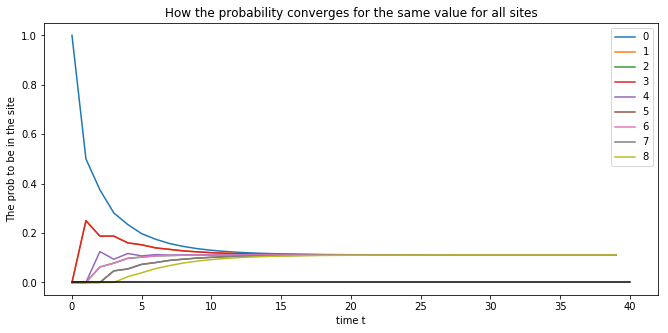

In [4]:
def evolution_alltime(t_max, L):
    i_s = np.zeros(L*L).T #Initial State 
    MT , alltime, i_s [0] = TransferMatrix(L) , np.zeros((t_max, L*L)), 1 # i_s [0]=1 that is my choice!
    #MT = Transfer Matrix / alltime recieve in each line the probability of occupance for 't' and the column is the sites
    
    for i in range(t_max): #Interation for each time until to reach the last time(t-max)
        alltime[i] = i_s
        new_s = np.dot(MT,i_s)
        i_s = new_s
    
    return alltime

#PLOT-----------------------------------------------------
t_max , L = 40, 3
plt.figure(figsize=(11,5))
for i in range(L*L):
    plt.plot([x for x in range(t_max)],evolution_alltime(t_max,L)[:,i],label=i)
plt.plot([0,t_max],[0,0],'k')
plt.xlabel('time t')
plt.ylabel('The prob to be in the site')
plt.title("How the probability converges for the same value for all sites")
plt.legend()
plt.show()

Now we can shift all result for $1/(n_of_sites)=1/9$ and we should achieve the zero in the equilibrium(means when all cells have the same probabality of ocupation)

In [5]:
def evolution_tozero(t_max, L):
    i_s = np.zeros(L*L,dtype=np.float64).T
    MT , alltime, i_s [0] = TransferMatrix(L) , np.zeros((t_max, L*L)), 1
    
    for i in range(t_max):
        alltime[i] = i_s
        new_s = np.dot(MT,i_s)
        i_s = new_s
    alltime = abs(1/(L*L)-alltime)

    return alltime, t_max, L

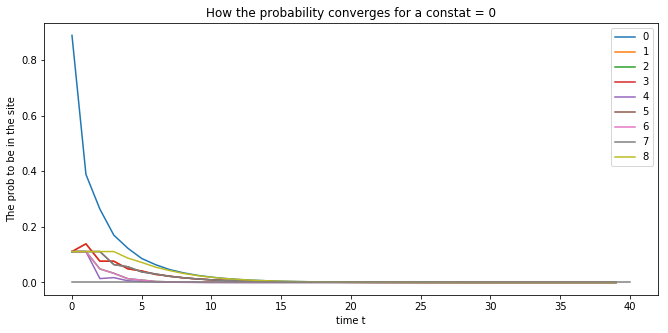

In [6]:
#That's values goes for all analysis---------------------------------------#
evolution_t_L = evolution_tozero(40,3)                                     #
evolution, t_max, L = evolution_t_L[0], evolution_t_L[1], evolution_t_L[2] #
#That's values goes for all analysis---------------------------------------#

plt.figure(figsize=(11,5))
for i in range(L*L):
    plt.plot([x for x in range(t_max)],evolution[:,i],label=i)
plt.plot([0,t_max],[0,0],'gray')
plt.xlabel('time t')
plt.ylabel('The prob to be in the site')
plt.title("How the probability converges for a constat = 0")
plt.legend()
plt.show()

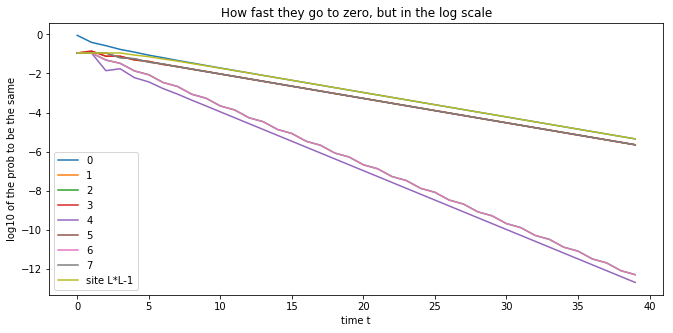

In [7]:
def Graflog10(): #The plot of np.log10(evolution_tozero()) and see how fast they go to zero. the bigger slope determine this
    plt.figure(figsize=(11,5))
    for i in range(L*L-1):
        plt.plot([x for x in range(len(evolution))],np.log10(evolution[:,i]),label=i)
    plt.plot([x for x in range(len(evolution))],np.log10(evolution[:,L*L-1]),label='site L*L-1')
    plt.xlabel('time t')
    plt.ylabel('log10 of the prob to be the same')
    plt.title("How fast they go to zero, but in the log scale")
    plt.legend()
    plt.show()
Graflog10()

The curve 8(to L=3) is slower curve to achive zero. What function have the same slope of the curve(straight line) eight? in the log10 scale we should have some thing as $f(t) = constante * t$. After to find the $constante$ we need write in the 10^{constante} base to recove the real curve! 

In [8]:
def slope(t_max, L):
    func = evolution_tozero(t_max, L)[0]
    funclog = np.log10(func)
    slow = funclog[:,L*L-1]

    slope1 = np.zeros(t_max - L*L)
    for i in range(t_max - L*L):
        slope1[i] = (slow[t_max-1] - slow[t_max-2-i])/(t_max-1 - (t_max-2-i))
    S1 = sum(slope1)/(t_max - L*L)
    
    slope2 = np.zeros(t_max - L*L)
    for i in range(t_max - L*L):
        slope2[i] = (slow[t_max-1-i] - slow[t_max-3-i])/(t_max-1-i - (t_max-3-i))
    S2 = sum(slope2)/(t_max - L*L)
    
    x = np.array([x for x in range(len(func))])
    #plt.plot(x,funclog[:,L*L-1]) #[:,L*L-1] gives the slower courve
    #plt.plot(x,x*(S2+S1)/2-(0.2+L/10), '.') #[:,L*L-1] gives the slower courve

    return (S2+S1)/2,x
slope(t_max, L)[0] 

-0.12466077673548162

-0.12466077673548162


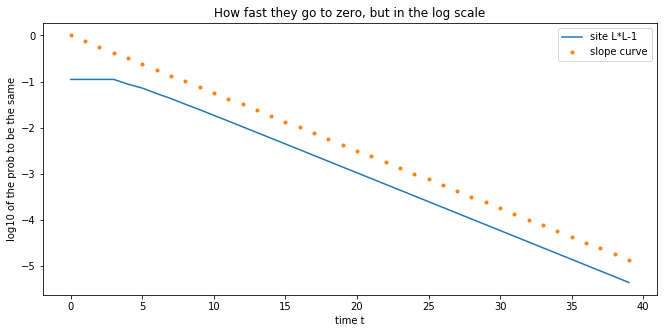

In [9]:
def Graflog10_slope(): #The plot of np.log10(evolution_tozero()) and see how fast they go to zero. the bigger slope determine this
    x = [x for x in range(t_max)]
    s = slope(t_max, L)[0]
    print(s)
    plt.figure(figsize=(11,5))
    plt.plot(x,np.log10(evolution[:,L*L-1]),label='site L*L-1')
    plt.plot(x,np.dot(x,s),'.',label='slope curve')
    plt.xlabel('time t')
    plt.ylabel('log10 of the prob to be the same')
    plt.title("How fast they go to zero, but in the log scale")
    plt.legend()
    plt.show()
Graflog10_slope()

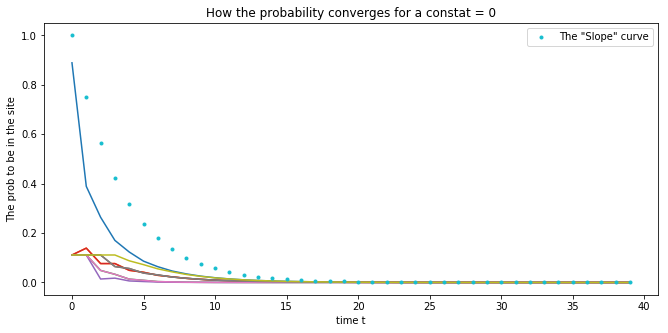

In [10]:
def realcurve(t_max, L):
    y = np.zeros(t_max)
    for i in range(t_max):
        y[i] = (10**(slope(t_max, L)[0]))**i
    return y

plt.figure(figsize=(11,5))
plt.plot([x for x in range(t_max)],evolution)
plt.plot([x for x in range(t_max)],realcurve(t_max, L), '.', label='The "Slope" curve')
plt.xlabel('time t')
plt.ylabel('The prob to be in the site')
plt.title("How the probability converges for a constat = 0")
plt.legend()
plt.show()

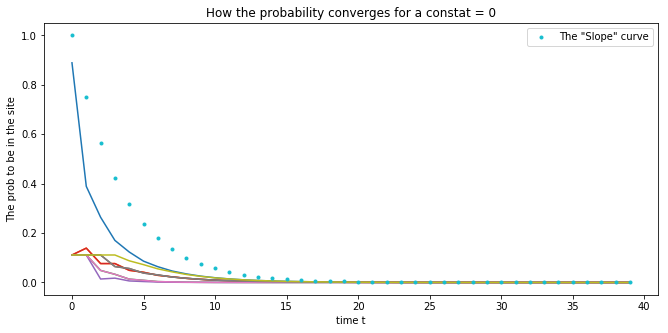

In [11]:
def realcurve(t_max, L):
    y = np.zeros(t_max)
    for i in range(t_max):
        y[i] = np.exp(np.log((10**slope(t_max, L)[0]))*i)
    return y

plt.figure(figsize=(11,5))
plt.plot([x for x in range(t_max)],evolution)
plt.plot([x for x in range(t_max)],realcurve(t_max, L), '.', label='The "Slope" curve')
plt.xlabel('time t')
plt.ylabel('The prob to be in the site')
plt.title("How the probability converges for a constat = 0")
plt.legend()
plt.show()

$np.exp(-t/(1/slope(t_max, L)[0]))$ $=$ $eˆ({-t/3.45})$